In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
import json

In [2]:
def extract_names(json_string):
    try:
        data = json.loads(json_string)

        return [item.get("name") for item in data if "name" in item]
    except Exception as e:
        return []


In [3]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")
# movies_df.original_language.unique()
# drop non-English movies
# movies_df = movies_df[movies_df.original_language == "en"]
# movies_df.to_csv("tmdb_5000_movies.csv", index=False)


In [4]:
credits_df = pd.read_csv("tmdb_5000_credits.csv")
#credits_df = pd.read_csv("tmdb_5000_credits.csv")
# for all indices in movies_df, drop the rows for ids not in credits_df
#credits_df = credits_df[credits_df['movie_id'].isin(movies_df['id'])]
#credits_df.to_csv("tmdb_5000_credits.csv", index=False)

top5_cast = list()
for i in credits_df['cast']:
    movie_actors = list()
    try:
        # get top 5 actors
        fish = json.loads(i)
        for j in range(5):
            #print((fish[j]['name']))
            movie_actors.append(fish[j]['name'])
      
    except:
        #print(i)
        pass
    top5_cast.append(movie_actors)

for i in top5_cast:
    if len(i) < 5:
        print(i)

only_5 = [i for i in top5_cast if len(i) == 5]
print(len(only_5))
# there are only 4354 movies with 5 actors listed
edited_credits_df = credits_df[credits_df.index.isin([i for i in range(len(top5_cast)) if len(top5_cast[i]) == 5])]


['Angus Macfadyen', 'Mario Yedidia', 'Marley Shelton', 'Chao Li Chi']
['Philippe Labro', 'Jacques Perrin']
['Jonathan Rhys Meyers', 'Radha Mitchell', 'Chow Yun-fat', 'Michelle Yeoh']
['Alec Baldwin', 'Peter Fonda', 'Mara Wilson']
["Emily Roya O'Brien", 'Adrian Gaeta', 'Zack Ward', 'Sarah Ann Schultz']
['Bono', 'The Edge', 'Adam Clayton', ' Larry Mullen Jr.']
[]
['Campbell Scott', 'Jennifer Jason Leigh', 'David Dukes', 'Estelle Parsons']
['Tony Jaa', 'Sarunyu Wongkrachang', 'Sorapong Chatree', 'Primorata Dejudom']
['Dolph Lundgren', 'Gina Bellman', 'Conrad Dunn', 'Christopher Heyerdahl']
['Bill Bellamy', 'Lark Voorhies', 'Bernie Mac', 'Elise Neal']
['Lau Ching-Wan', 'Tang Wei', 'Qin Hailu', 'Jing Boran ']
['Michel Serrault', 'Isabelle Huppert', 'François Cluzet', 'Jean-François Balmer']
['Olivier Martinez', 'Aitana Sánchez-Gijón', 'Romane Bohringer', 'Didier Bezace']
['Corbin Bleu', 'Sandra Echeverría', 'Madison Pettis']
['Luke Perry', 'LeAnn Rimes', 'Jimmi Simpson']
['Robert Redford']


In [5]:
combined_df = movies_df.merge(right = credits_df, left_on = "id",right_on = "movie_id", how = "inner")
combined_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],...,[],Released,NaN,Cavite,7.5,2,67238,Cavite,[],"[{""credit_id"": ""52fe475dc3a368484e0c319f"", ""de..."
4501,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4502,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {

In [6]:
combined_df = combined_df.replace({"[]": float("nan")})

In [7]:
combined_df.isnull().sum()

budget                     0
genres                    28
homepage                2894
id                         0
keywords                 370
original_language          0
original_title             0
overview                   1
popularity                 0
production_companies     319
production_countries     166
release_date               1
revenue                    0
runtime                    1
spoken_languages          85
status                     0
tagline                  716
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                      42
crew                      28
dtype: int64

In [8]:
combined_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [9]:
# movies_df[movies_df.isnull()["release_date"]]
combined_df = combined_df.drop(columns=["homepage", "overview", "tagline", "status", "title_x", "title_y", "movie_id",]).dropna().reset_index(drop=True)
combined_df

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,13,"[{""id"": 27, ""name"": ""Horror""}]",157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}]",2007-01-01,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2.0,1,"[{""cast_id"": 1, ""character"": ""Dave"", ""credit_i...","[{""credit_id"": ""54c7851b925141679100372a"", ""de..."
3920,0,"[{""id"": 18, ""name"": ""Drama""}]",124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-09-09,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.0,1,"[{""cast_id"": 2, ""character"": ""The Girl"", ""cred...","[{""credit_id"": ""52fe4ab0c3a368484e161add"", ""de..."
3921,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,23.307949,"[{""name"": ""Thinkfilm"", ""id"": 446}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,658,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_..

In [10]:
combined_df.head(1)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
combined_df["genres"] = combined_df["genres"].apply(extract_names)
combined_df["keywords"] = combined_df["keywords"].apply(extract_names)
combined_df["production_companies"] = combined_df["production_companies"].apply(extract_names)
combined_df["production_countries"] = combined_df["production_countries"].apply(extract_names)
combined_df["spoken_languages"] = combined_df["spoken_languages"].apply(extract_names)
combined_df["cast"] = combined_df["cast"].apply(extract_names)
# combined_df["crew"] = combined_df["crew"].apply(extract_names)

combined_df["cast"] = combined_df["cast"].map(lambda x: x[:5].copy())
combined_df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
combined_df.dtypes

budget                    int64
genres                   object
id                        int64
keywords                 object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

In [13]:
combined_df.original_language.value_counts()

original_language
en    3924
Name: count, dtype: int64

In [14]:
len(combined_df)

3924

In [15]:
combined_df[combined_df.revenue == 0][["budget", "original_title"]]

,budget,original_title
132,150000000,The Wolfman
261,0,The Cat in the Hat
304,84000000,Son of the Mask
369,90000000,Volcano
398,0,Arthur Christmas
...,...,...
3917,0,Backmask
3919,13,Tin Can Man
3920,0,Bang
3922,0,"Signed, Sealed, Delivered"


In [16]:
# combined_df.status.value_counts()

In [17]:
# get the directors from the crew column from credits_df
def extract_directors(data_frame):

    directors = list()
    for i in data_frame['crew']:
        d_list = list()
        sub_string = '"job": "Director"'
        count = i.count(sub_string)
        try:
            for j in range(count):
                start_index = i.index(sub_string)
                # get the substring from the start_index to the next closing curly brace
                end_index = i.index("}", start_index)
                director_substring = i[start_index-30:end_index+1]
                # extract the name value from the substring
                name_start_index = director_substring.index('"name": "') + len('"name": "')
                name_end_index = director_substring.index('"', name_start_index)
                director_name = director_substring[name_start_index:name_end_index]
                d_list.append(director_name)
                # remove the processed substring from i
                i = i[end_index+1:]
        except:
            #print(i)
            pass
        directors.append(d_list)
        
    directors = [i for i in directors if len(i) == 1]
    return directors

# num of movies with one director for all english movies, and only those with 5 actors listed, respectively.
print(len(extract_directors(credits_df)))
print(len(extract_directors(edited_credits_df)))

4465
4343


In [18]:
mlb = MultiLabelBinarizer()
genres_mlb = mlb.fit_transform(combined_df['genres'])

genres_df = pd.DataFrame(genres_mlb, columns=mlb.classes_, index=combined_df.index)
genres_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
combined_df = pd.concat([combined_df, genres_df], axis=1).drop(columns=['genres'])
combined_df.head()

,budget,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,19995,"[culture clash, future, space war, space colon...",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,...,0,0,0,0,0,1,0,0,0,0
1,300000000,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,...,0,0,0,0,0,0,0,0,0,0
2,245000000,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,...,0,0,0,0,0,0,0,0,0,0
3,250000000,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,...,0,0,0,0,0,0,0,1,0,0
4,260000000,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,...,0,0,0,0,0,1,0,0,0,0


In [20]:
combined_df['release_date'] = pd.to_datetime(combined_df['release_date'])
# combined_df.head()

#Should make dates easier to work with if needed
combined_df.dtypes

budget                           int64
id                               int64
keywords                        object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
cast                            object
crew                            object
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                            int64
Documentary                      int64
Drama                            int64
Family                           int64
Fantasy                          int64
Foreign                  

## Continue feature engineering above

In [21]:
combined_df = combined_df.sort_values(by='release_date')

combined_df["release_year"] = combined_df["release_date"].dt.year
combined_df["release_quarter"] = combined_df["release_date"].dt.quarter

train_df, val_df = train_test_split(combined_df, test_size=0.2, shuffle=False)

train_df = shuffle(train_df, random_state=865)

train_y = train_df['revenue']
train_X = train_df.drop(columns=['revenue'])
val_y = val_df['revenue']
val_X = val_df.drop(columns=['revenue'])

train_X.head()

,budget,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year,release_quarter
1093,40000000,11066,"[role of women, ladykiller, success, ladies' m...",en,Boomerang,6.420434,[Paramount Pictures],[United States of America],1992-06-30,117.0,...,0,0,1,0,0,0,0,0,1992,2
1875,24000000,10358,"[pornography, love of one's life, platonic lov...",en,Zack and Miri Make a Porno,27.326466,"[Blue Askew, View Askew Productions]",[United States of America],2008-09-18,102.0,...,0,0,0,0,0,0,0,0,2008,3
3398,0,850,"[holiday, nostalgia, young boy, bb gun, essay,...",en,A Christmas Story,15.128316,"[Metro-Goldwyn-Mayer (MGM), Christmas Tree Films]","[United States of America, Canada]",1983-11-18,94.0,...,0,0,0,0,0,0,0,0,1983,4
502,75000000,9802,"[san francisco, fbi, gas attack, alcatraz, hos...",en,The Rock,51.469576,"[Hollywood Pictures, Don Simpson/Jerry Bruckhe...",[United States of America],1996-06-06,136.0,...,0,0,0,0,0,1,0,0,1996,2
3087,6000000,12163,"[supermarket, heart attack, ambition, daughter...",en,The Wrestler,40.196514,"[Saturn Films, Wild Bunch, Protozoa Pictures, ...",[United States of America],2008-09-07,109.0,...,0,0,1,0,0,0,0,0,2008,3


In [22]:
# Actor/director score should be determined after the split but before removing unneeded columns. Ideally, here

In [23]:
cols = ['release_date', 'id', 'keywords', 'original_language', 'original_title', 'popularity', 'production_companies', 
                          'production_countries', 'spoken_languages', 'vote_average', 'vote_count', 'cast', 'crew']
train_X.drop(columns=cols, inplace=True)
val_X.drop(columns=cols, inplace=True)

train_X.head()

,budget,runtime,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year,release_quarter
1093,40000000,117.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1992,2
1875,24000000,102.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2008,3
3398,0,94.0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1983,4
502,75000000,136.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1996,2
3087,6000000,109.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,2008,3


c:\Users\sesso\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation RMSE: 141,602,683.86
Train RMSE: 95,030,370.01

Validation MAE:  73,744,239.12
Train MAE:  52,711,624.99

Validation R^2:   0.6273
Train R^2:   0.6311


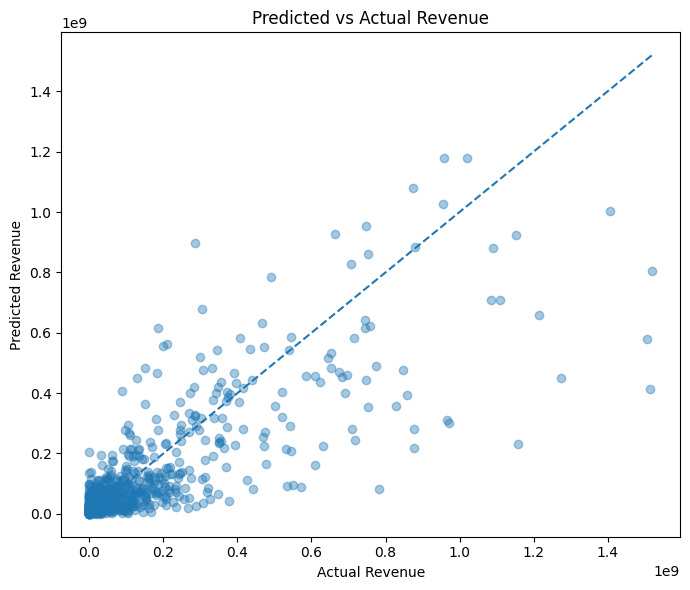

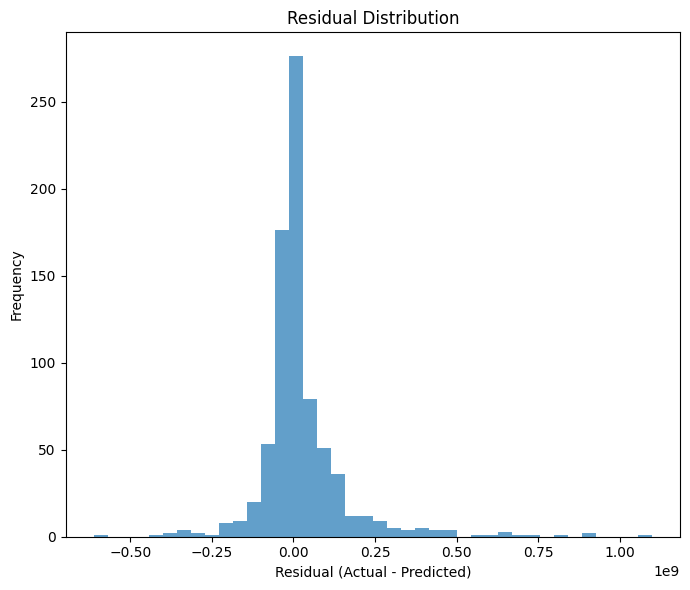

In [24]:
transform = ColumnTransformer(
    transformers=[
       # ('OHE', OneHotEncoder(handle_unknown='ignore'), []),
        ('standard', StandardScaler(), ['budget']),
        ('minmax', MinMaxScaler(), ['runtime', 'release_year', 'release_quarter']),
    ],
    remainder='passthrough'
)

model = make_pipeline(
    transform,
    MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),
        learning_rate_init=.01, # Default .001
        # alpha=.001, # Default .0001 - L2 reg
        max_iter=1000,
        random_state=865
    )
)

model.fit(train_X, train_y)

y_pred = model.predict(val_X)
train_pred = model.predict(train_X)

rmse = np.sqrt(mean_squared_error(val_y, y_pred))
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
mae = mean_absolute_error(val_y, y_pred)
train_mae = mean_absolute_error(train_y, train_pred)
r2 = r2_score(val_y, y_pred)
train_r2 = r2_score(train_y, train_pred)

print(f"Validation RMSE: {rmse:,.2f}")
print(f"Train RMSE: {train_rmse:,.2f}")
print(f"\nValidation MAE:  {mae:,.2f}")
print(f"Train MAE:  {train_mae:,.2f}")
print(f"\nValidation R^2:   {r2:.4f}")
print(f"Train R^2:   {train_r2:.4f}")

plt.figure(figsize=(7, 6))
plt.scatter(val_y, y_pred, alpha=0.4)
plt.plot([val_y.min(), val_y.max()], 
         [val_y.min(), val_y.max()], 
         linestyle="--")

plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Predicted vs Actual Revenue")
plt.tight_layout()
plt.show()

residuals = val_y - y_pred
plt.figure(figsize=(7, 6))
plt.hist(residuals, bins=40, alpha=0.7)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()